In [4]:
import numpy as np
import matplotlib.pyplot as plt

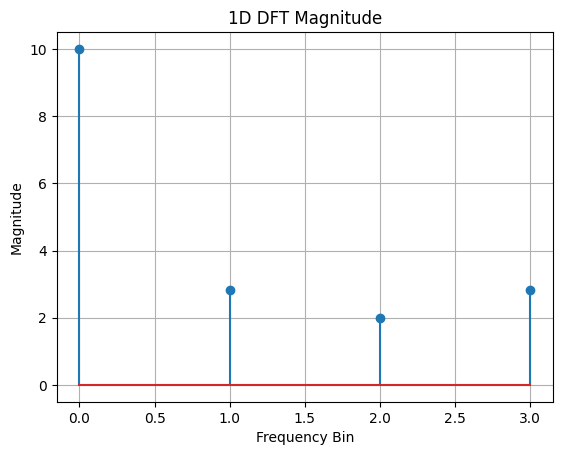

In [22]:
def dft_1d(x):
    N = len(x)
    X = []
    for k in range(N):
        Xk = 0
        for n in range(N):
            Xk += x[n] * np.exp(-2j * np.pi * k * n / N)
        X.append(Xk)
    return np.array(X)

x = np.array([1, 2, 3, 4])
X = dft_1d(x)

plt.stem(np.abs(X))
plt.title("1D DFT Magnitude")
plt.xlabel("Frequency Bin")
plt.ylabel("Magnitude") 
plt.grid(True)
plt.show()


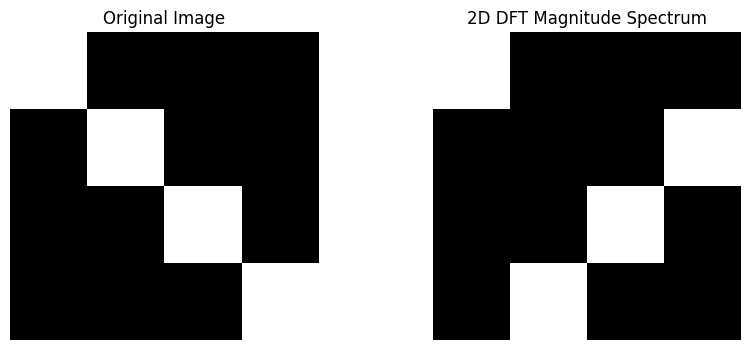

In [7]:
def dft_2d(img):
    M, N = img.shape
    F = np.zeros((M, N), dtype=complex)
    for u in range(M):
        for v in range(N):
            sum_uv = 0
            for x in range(M):
                for y in range(N):
                    angle = -2j * np.pi * ((u * x / M) + (v * y / N))
                    sum_uv += img[x, y] * np.exp(angle)
            F[u, v] = sum_uv
    return F

sample_img = np.array([
    [255, 0, 0, 0],
    [0, 255, 0, 0],
    [0, 0, 255, 0],
    [0, 0, 0, 255]
], dtype=float)

F = dft_2d(sample_img)

magnitude = np.abs(F)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(sample_img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(np.log(magnitude + 1), cmap='gray')  # log scale for visibility
plt.title("2D DFT Magnitude Spectrum")
plt.axis('off')
plt.show()


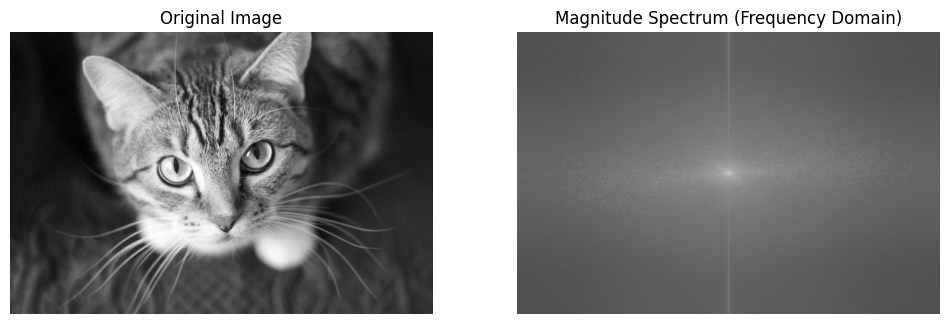

In [19]:
import cv2

img = cv2.imread("lab1/img/cat.jpg", 0)  # Replace 'your_image.jpg' with your image path

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)  # +1 to avoid log(0)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum (Frequency Domain)")
plt.axis('off')

plt.show()


In [20]:
def ideal_low_pass(shape, cutoff):
    M, N = shape
    center = (int(M/2), int(N/2))
    H = np.zeros((M, N))
    for u in range(M):
        for v in range(N):
            if np.sqrt((u - center[0])**2 + (v - center[1])**2) <= cutoff:
                H[u, v] = 1
    return H

def butterworth_low_pass(shape, cutoff, order=2):
    M, N = shape
    center = (int(M/2), int(N/2))
    H = np.zeros((M, N))
    for u in range(M):
        for v in range(N):
            D = np.sqrt((u - center[0])**2 + (v - center[1])**2)
            H[u, v] = 1 / (1 + (D / cutoff)**(2 * order))
    return H

def gaussian_low_pass(shape, cutoff):
    M, N = shape
    center = (int(M/2), int(N/2))
    H = np.zeros((M, N))
    for u in range(M):
        for v in range(N):
            D_squared = (u - center[0])**2 + (v - center[1])**2
            H[u, v] = np.exp(-D_squared / (2 * (cutoff**2)))
    return H


In [16]:
def ideal_high_pass(shape, cutoff):
    return 1 - ideal_low_pass(shape, cutoff)

def butterworth_high_pass(shape, cutoff, order=2):
    return 1 - butterworth_low_pass(shape, cutoff, order)

def gaussian_high_pass(shape, cutoff):
    return 1 - gaussian_low_pass(shape, cutoff)


In [17]:
def apply_filter(img, H):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    # Apply filter mask
    G = H * fshift
    # Shift back
    g_ishift = np.fft.ifftshift(G)
    # Inverse FFT to get filtered image
    img_back = np.fft.ifft2(g_ishift)
    return np.abs(img_back)


In [23]:
cutoff = 30 

ideal_lp = ideal_low_pass(img.shape, cutoff)
butter_lp = butterworth_low_pass(img.shape, cutoff)
gauss_lp = gaussian_low_pass(img.shape, cutoff)

ideal_hp = ideal_high_pass(img.shape, cutoff)
butter_hp = butterworth_high_pass(img.shape, cutoff)
gauss_hp = gaussian_high_pass(img.shape, cutoff)

img_ideal_lp = apply_filter(img, ideal_lp)
img_butter_lp = apply_filter(img, butter_lp)
img_gauss_lp = apply_filter(img, gauss_lp)

img_ideal_hp = apply_filter(img, ideal_hp)
img_butter_hp = apply_filter(img, butter_hp)
img_gauss_hp = apply_filter(img, gauss_hp)

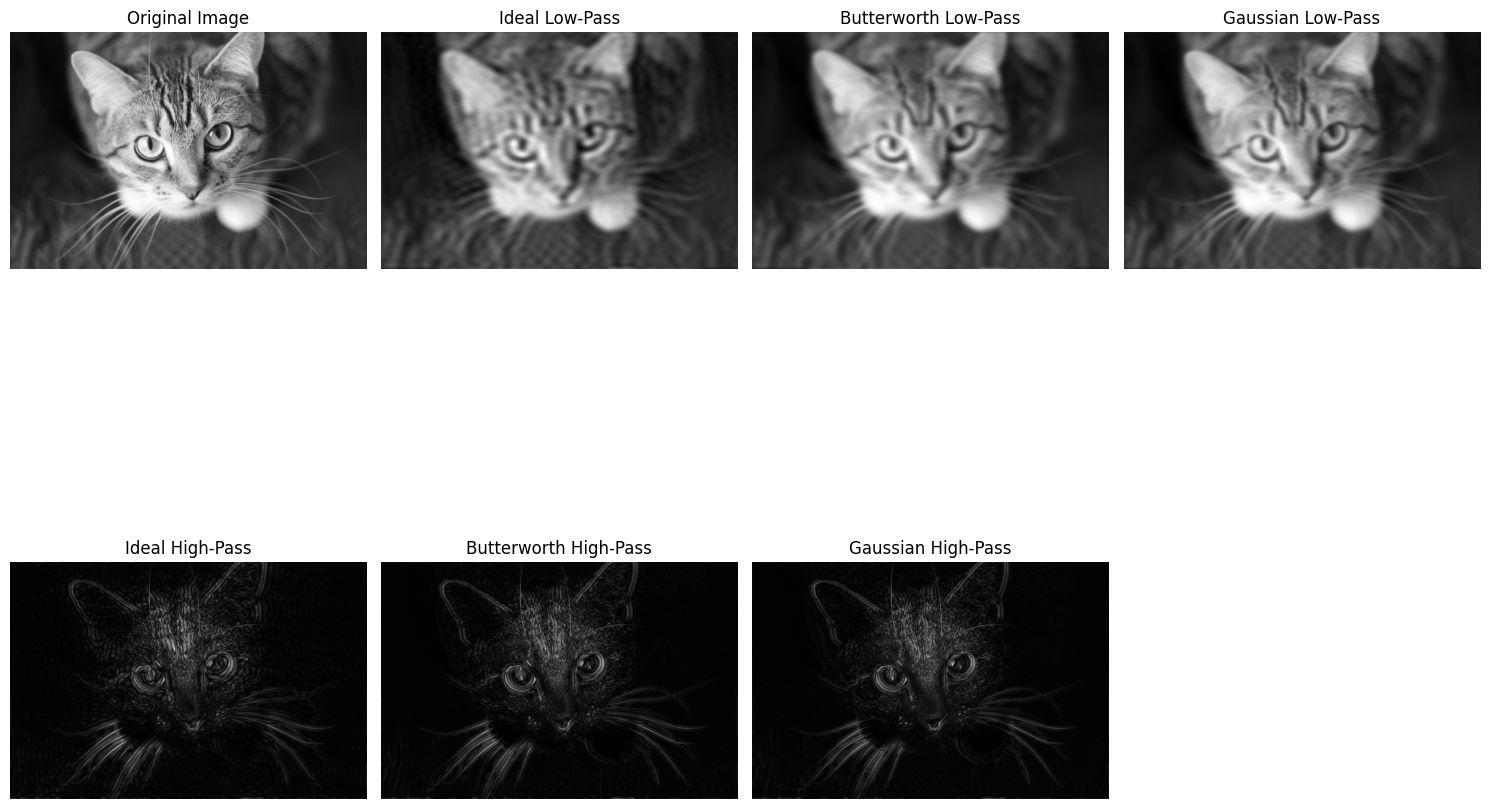

In [25]:
plt.figure(figsize=(15,12))

plt.subplot(2,4,1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(2,4,2)
plt.imshow(img_ideal_lp, cmap='gray')
plt.title("Ideal Low-Pass")
plt.axis('off')

plt.subplot(2,4,3)
plt.imshow(img_butter_lp, cmap='gray')
plt.title("Butterworth Low-Pass")
plt.axis('off')

plt.subplot(2,4,4)
plt.imshow(img_gauss_lp, cmap='gray')
plt.title("Gaussian Low-Pass")
plt.axis('off')

plt.subplot(2,4,5)
plt.imshow(img_ideal_hp, cmap='gray')
plt.title("Ideal High-Pass")
plt.axis('off')

plt.subplot(2,4,6)
plt.imshow(img_butter_hp, cmap='gray')
plt.title("Butterworth High-Pass")
plt.axis('off')

plt.subplot(2,4,7)
plt.imshow(img_gauss_hp, cmap='gray')
plt.title("Gaussian High-Pass")
plt.axis('off')

plt.tight_layout()
plt.show()
